By: Dominikus Krisna Herlambang | ©2024

In [ ]:
invisible(suppressWarnings(suppressPackageStartupMessages(lapply(
  c('ncdf4','dplyr','ggplot2'),
  library, character.only = TRUE
))))

In [ ]:
isi.nc <- nc_open('sst_pacific.nc')
isi.nc$ndims

[1] 4

In [ ]:
sapply(
  isi.nc$dim, function(input) input$name
)

isi.nc$nvars

LON381_1201    LAT281_441          TIME          bnds 
"LON381_1201"  "LAT281_441"        "TIME"        "bnds"

[1] 2

In [ ]:
sapply(isi.nc$var, \(x) x$name) %>%
  as.vector

isi.nc

[1] "TIME_bnds" "SST"

File /content/drive/MyDrive/Ocean_Atmosfer_Visualization/R Programming/sst_pacific.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        double TIME_bnds[bnds,TIME]   
        float SST[LON381_1201,LAT281_441,TIME]   
            missing_value: 9.99900026055401e+20
            _FillValue: 9.99900026055401e+20
            long_name: sea surface temperature [k]
            history: From Surface

     4 dimensions:
        LON381_1201  Size:821 
            units: degrees_east
            long_name: longitude
            modulo: 360
            point_spacing: even
            axis: X
        LAT281_441  Size:161 
            units: degrees_north
            long_name: latitude
            point_spacing: even
            axis: Y
        TIME  Size:121   *** is unlimited *** 
            units: days since 0001-01-01 00:00:00
            long_name: time
            time_origin: 01-JAN-0001 00:00:00
            axis: T
            bounds: TIME_bnds
        bnds  S

[1] 821 161 121

297.0425,297.1880,297.2720,297.3550,297.4937
297.2378,297.4097,297.5454,297.6450,297.7700
297.3647,297.6187,297.7798,297.9116,298.0229
297.4634,297.7271,297.9419,298.0952,298.2065
297.5142,297.8013,298.0327,298.2017,298.3208


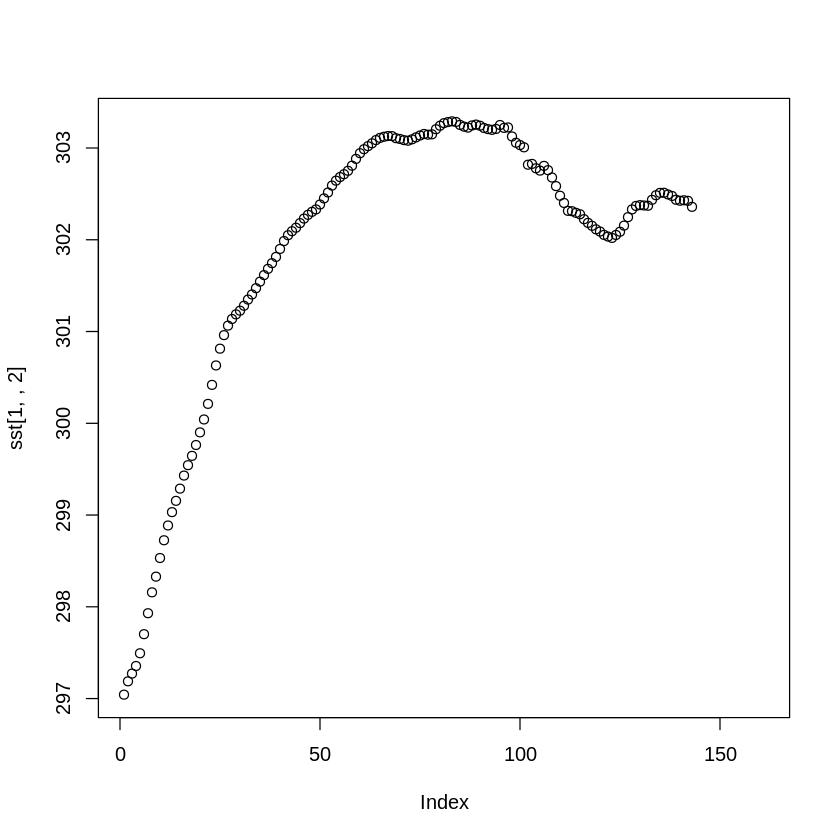

In [ ]:
sst <- ncvar_get(isi.nc, 'SST')
dim(sst)

sst[1:5, 1:5, 2]
plot(sst[1,,2], type='b')

lon <- ncvar_get(isi.nc, 'LON381_1201')
lat <- ncvar_get(isi.nc, 'LAT281_441')
waktu <- ncvar_get(isi.nc, 'TIME')

In [ ]:
lon
lat
waktu

[1]  95.00  95.25  95.50  95.75  96.00  96.25  96.50  96.75  97.00  97.25
 [11]  97.50  97.75  98.00  98.25  98.50  98.75  99.00  99.25  99.50  99.75
 [21] 100.00 100.25 100.50 100.75 101.00 101.25 101.50 101.75 102.00 102.25
 [31] 102.50 102.75 103.00 103.25 103.50 103.75 104.00 104.25 104.50 104.75
 [41] 105.00 105.25 105.50 105.75 106.00 106.25 106.50 106.75 107.00 107.25
 [51] 107.50 107.75 108.00 108.25 108.50 108.75 109.00 109.25 109.50 109.75
 [61] 110.00 110.25 110.50 110.75 111.00 111.25 111.50 111.75 112.00 112.25
 [71] 112.50 112.75 113.00 113.25 113.50 113.75 114.00 114.25 114.50 114.75
 [81] 115.00 115.25 115.50 115.75 116.00 116.25 116.50 116.75 117.00 117.25
 [91] 117.50 117.75 118.00 118.25 118.50 118.75 119.00 119.25 119.50 119.75
[101] 120.00 120.25 120.50 120.75 121.00 121.25 121.50 121.75 122.00 122.25
[111] 122.50 122.75 123.00 123.25 123.50 123.75 124.00 124.25 124.50 124.75
[121] 125.00 125.25 125.50 125.75 126.00 126.25 126.50 126.75 127.00 127.25
[131] 127.50 127.75 128.00 128.25 128.50 128.75 129.00 129.25 129.50 129.75
[141] 130.00 130.25 130.50 130.75 131.00 131.25 131.50 131.75 132.00 132.25
[151] 132.50 132.75 133.00 133.25 133.50 133.75 134.00 134.25 134.50 134.75
[161] 135.00 135.25 135.50 135.75 136.00 136.25 136.50 136.75 137.00 137.25
[171] 137.50 137.75 138.00 138.25 138.50 138.75 139.00 139.25 139.50 139.75
[181] 140.00 140.25 140.50 140.75 141.00 141.25 141.50 141.75 142.00 142.25
[191] 142.50 142.75 143.00 143.25 143.50 143.75 144.00 144.25 144.50 144.75
[201] 145.00 145.25 145.50 145.75 146.00 146.25 146.50 146.75 147.00 147.25
[211] 147.50 147.75 148.00 148.25 148.50 148.75 149.00 149.25 149.50 149.75
[221] 150.00 150.25 150.50 150.75 151.00 151.25 151.50 151.75 152.00 152.25
[231] 152.50 152.75 153.00 153.25 153.50 153.75 154.00 154.25 154.50 154.75
[241] 155.00 155.25 155.50 155.75 156.00 156.25 156.50 156.75 157.00 157.25
[251] 157.50 157.75 158.00 158.25 158.50 158.75 159.00 159.25 159.50 159.75
[261] 160.00 160.25 160.50 160.75 161.00 161.25 161.50 161.75 162.00 162.25
[271] 162.50 162.75 163.00 163.25 163.50 163.75 164.00 164.25 164.50 164.75
[281] 165.00 165.25 165.50 165.75 166.00 166.25 166.50 166.75 167.00 167.25
[291] 167.50 167.75 168.00 168.25 168.50 168.75 169.00 169.25 169.50 169.75
[301] 170.00 170.25 170.50 170.75 171.00 171.25 171.50 171.75 172.00 172.25
[311] 172.50 172.75 173.00 173.25 173.50 173.75 174.00 174.25 174.50 174.75
[321] 175.00 175.25 175.50 175.75 176.00 176.25 176.50 176.75 177.00 177.25
[331] 177.50 177.75 178.00 178.25 178.50 178.75 179.00 179.25 179.50 179.75
[341] 180.00 180.25 180.50 180.75 181.00 181.25 181.50 181.75 182.00 182.25
[351] 182.50 182.75 183.00 183.25 183.50 183.75 184.00 184.25 184.50 184.75
[361] 185.00 185.25 185.50 185.75 186.00 186.25 186.50 186.75 187.00 187.25
[371] 187.50 187.75 188.00 188.25 188.50 188.75 189.00 189.25 189.50 189.75
[381] 190.00 190.25 190.50 190.75 191.00 191.25 191.50 191.75 192.00 192.25
[391] 192.50 192.75 193.00 193.25 193.50 193.75 194.00 194.25 194.50 194.75
[401] 195.00 195.25 195.50 195.75 196.00 196.25 196.50 196.75 197.00 197.25
[411] 197.50 197.75 198.00 198.25 198.50 198.75 199.00 199.25 199.50 199.75
[421] 200.00 200.25 200.50 200.75 201.00 201.25 201.50 201.75 202.00 202.25
[431] 202.50 202.75 203.00 203.25 203.50 203.75 204.00 204.25 204.50 204.75
[441] 205.00 205.25 205.50 205.75 206.00 206.25 206.50 206.75 207.00 207.25
[451] 207.50 207.75 208.00 208.25 208.50 208.75 209.00 209.25 209.50 209.75
[461] 210.00 210.25 210.50 210.75 211.00 211.25 211.50 211.75 212.00 212.25
[471] 212.50 212.75 213.00 213.25 213.50 213.75 214.00 214.25 214.50 214.75
[481] 215.00 215.25 215.50 215.75 216.00 216.25 216.50 216.75 217.00 217.25
[491] 217.50 217.75 218.00 218.25 218.50 218.75 219.00 219.25 219.50 219.75
[501] 220.00 220.25 220.50 220.75 221.00 221.25 221.50 221.75 222.00 222.25
[511] 222.50 222.75 223.00 223.25 223.50 223.75 224.00 224.25 224.50 224.75
[521] 225.00 225.25 225.50 225.75 226.00 226.25 22

[1] -20.00 -19.75 -19.50 -19.25 -19.00 -18.75 -18.50 -18.25 -18.00 -17.75
 [11] -17.50 -17.25 -17.00 -16.75 -16.50 -16.25 -16.00 -15.75 -15.50 -15.25
 [21] -15.00 -14.75 -14.50 -14.25 -14.00 -13.75 -13.50 -13.25 -13.00 -12.75
 [31] -12.50 -12.25 -12.00 -11.75 -11.50 -11.25 -11.00 -10.75 -10.50 -10.25
 [41] -10.00  -9.75  -9.50  -9.25  -9.00  -8.75  -8.50  -8.25  -8.00  -7.75
 [51]  -7.50  -7.25  -7.00  -6.75  -6.50  -6.25  -6.00  -5.75  -5.50  -5.25
 [61]  -5.00  -4.75  -4.50  -4.25  -4.00  -3.75  -3.50  -3.25  -3.00  -2.75
 [71]  -2.50  -2.25  -2.00  -1.75  -1.50  -1.25  -1.00  -0.75  -0.50  -0.25
 [81]   0.00   0.25   0.50   0.75   1.00   1.25   1.50   1.75   2.00   2.25
 [91]   2.50   2.75   3.00   3.25   3.50   3.75   4.00   4.25   4.50   4.75
[101]   5.00   5.25   5.50   5.75   6.00   6.25   6.50   6.75   7.00   7.25
[111]   7.50   7.75   8.00   8.25   8.50   8.75   9.00   9.25   9.50   9.75
[121]  10.00  10.25  10.50  10.75  11.00  11.25  11.50  11.75  12.00  12.25
[131]  12.50  12.75  13.00  13.25  13.50  13.75  14.00  14.25  14.50  14.75
[141]  15.00  15.25  15.50  15.75  16.00  16.25  16.50  16.75  17.00  17.25
[151]  17.50  17.75  18.00  18.25  18.50  18.75  19.00  19.25  19.50  19.75
[161]  20.00

[1] 735355 735386 735416 735447 735478 735508 735539 735569 735600 735631
 [11] 735659 735690 735720 735751 735781 735812 735843 735873 735904 735934
 [21] 735965 735996 736025 736056 736086 736117 736147 736178 736209 736239
 [31] 736270 736300 736331 736362 736390 736421 736451 736482 736512 736543
 [41] 736574 736604 736635 736665 736696 736727 736755 736786 736816 736847
 [51] 736877 736908 736939 736969 737000 737030 737061 737092 737120 737151
 [61] 737181 737212 737242 737273 737304 737334 737365 737395 737426 737457
 [71] 737486 737517 737547 737578 737608 737639 737670 737700 737731 737761
 [81] 737792 737823 737851 737882 737912 737943 737973 738004 738035 738065
 [91] 738096 738126 738157 738188 738216 738247 738277 738308 738338 738369
[101] 738400 738430 738461 738491 738522 738553 738581 738612 738642 738673
[111] 738703 738734 738765 738795 738826 738856 738887 738918 738947 738978
[121] 739008

In [ ]:
data.rh <- expand.grid(
  lon = lon, lat = lat
) %>%
  data.table %>%
  [, sst := sst[,,2] %>% as.vector]

data.rh[]

lon,lat,sst
<dbl[1d]>,<dbl[1d]>,<dbl>
95.00,-20,297.0425
95.25,-20,297.2378
95.50,-20,297.3647
95.75,-20,297.4634
96.00,-20,297.5142
96.25,-20,297.5913
96.50,-20,297.7544
96.75,-20,297.9380
97.00,-20,297.9888


In [ ]:
peta <- getMap('high') %>%
  sf::st_as_sf()

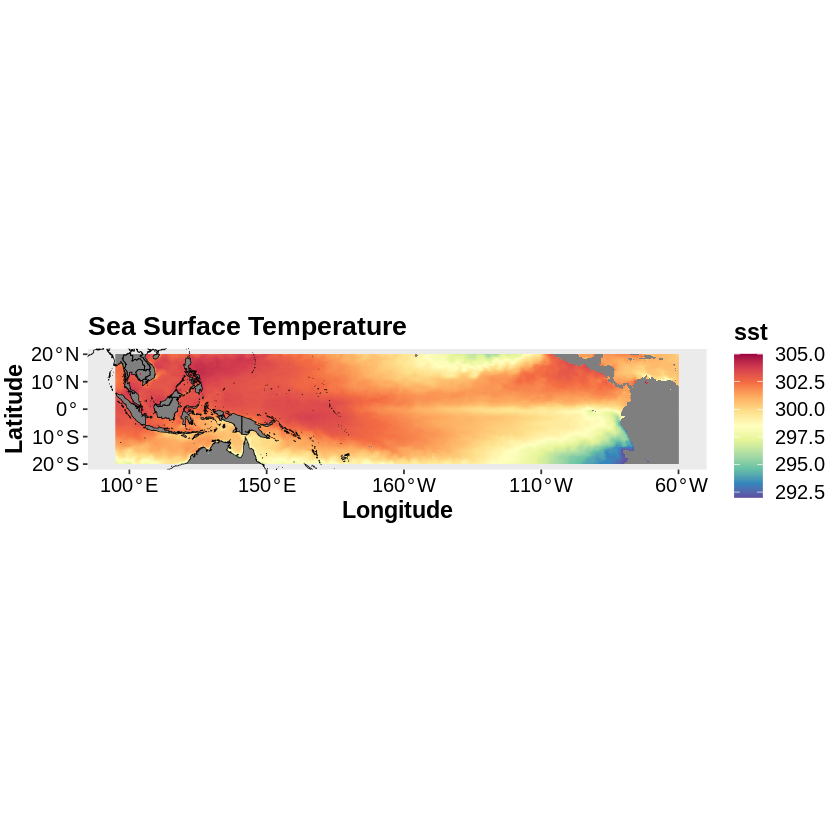

In [ ]:
ggplot() +
  geom_raster(
    aes(longitude,latitude,fill=sst),
    data.rh
  ) +
  geom_sf(data = peta, fill=NA, color='black') +
  scale_fill_gradientn(colors=brewer.pal(11,'Spectral') %>% rev) +
  coord_sf(xlim=data.rh[,range(lon)],ylim=data.rh[,range(lat)])